# **Data Preprocessing for Machine Learning Project**

This project aims to conduct a 


## **Table of content**
1. Define data quality criteria
2. Import libaries and load the dataset
3. Understand and explore the dataset
- *3.1 Understand the dataset*
- *3.2 Understand the context with data visualisation*
4. Further analyse dataset quality
- *4.1 Analyse data quality*
- *4.2 Analyse data relevance*
5. Preprocessing for ML model
- *5.1 Handle data quality issues*
- *5.2 Save versions of dataset*
6. Validation and Testing

<div style="border-top: 7px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### **1 Define data quality criteria**
Data sources: given dataset in excel file format.
- Data should be consistent with uniform data type, size, pattern, and format for each attribute
- Data should be complete, no missing values
- Data should be accurate and valid, no errors
- Data should have be relevant and have meaningful arributes

<div style="border-top: 3px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### **2 Import libraries and load the dataset**
- Import the relevant libraries
- Load the dataset

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [2]:
# load the data.
df = pd.read_excel("SIS_Faculty-List.xlsx")

<div style="border-top: 3px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### 3 **Understand and explore the dataset**
#### **3.1 Understand the dataset**
- Display dataset for first impression
- Get an overview
- Understand attributes
- Understand unique values and their frequencies of each variable
- Understand relationship between features

##### Display dataset

In [3]:
# Display the first few rows of the DateFrame to have first impression.
df.head()

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,2010-08-29,NaT,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,1999-08-19,NaT,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,2007-04-08,NaT,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,2016-08-14,NaT,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


Note: inconsistent formats. Formats, case and length of some column names need to be changed. 
Some column names are not so clearly labeled.

##### Get an overview 

In [4]:
# Get general information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 19 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                                         --------------  -----         
 0   ID                                                                                                                             282 non-null    object        
 1   Name                                                                                                                           284 non-null    object        
 2   Location                                                                                                                       270 non-null    object        
 3   Grade                                                                      

Note: some varaibles have missing values. 17 variables have 'object' data type, 2 variables have datetime data type.

##### Understand attributes

In [5]:
# Understand attributes by printing out column names.
print("Column Names:", df.columns)

Column Names: Index(['ID', 'Name', 'Location', 'Grade', 'Title', 'Join\nDate', 'LWD', 'Type',
       'Divison', 'Reports To', 'Highest\nQualification\nLevel',
       'Highest Qualification', 'Major', 'University',
       'All Qualifications from Profile', 'Courses Taught- Term 201510',
       'MAJOR TEACHING FIELD',
       'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications',
       'Criteria'],
      dtype='object')


In [6]:
# Describe the attributes with 'datetime' datatype.
summary1 = df.describe(include = [np.datetime64])
print(summary1)

                 Join\nDate                  LWD
count                   283                   11
unique                  143                    2
top     2016-08-14 00:00:00  2015-12-17 00:00:00
freq                     41                    6
first   1989-08-12 00:00:00  2015-12-17 00:00:00
last    2016-08-14 00:00:00  2015-12-22 00:00:00


C:\Users\stoer\AppData\Local\Temp\ipykernel_13552\2982278152.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary1 = df.describe(include = [np.datetime64])
C:\Users\stoer\AppData\Local\Temp\ipykernel_13552\2982278152.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary1 = df.describe(include = [np.datetime64])


Note: some abnormalities in variable LWD, many missing values. 

In [7]:
# Describe the attributes with object datatype.
summary2 = df.describe(include = 'object')
print(summary2)

         ID           Name Location Grade               Title       Type  \
count   282            284      270   284                 284        284   
unique  243            282       16     2                  12          1   
top       0  Zikida Koudou  Bristol    FA  Faculty - Business  Full Time   
freq     40              2       49   282                 252        284   

         Divison  Reports To Highest\nQualification\nLevel  \
count        284         280                           278   
unique         1          15                            18   
top     Business  Ian Varley                       Masters   
freq         284          33                           157   

                 Highest Qualification                    Major  \
count                              278                      262   
unique                              59                      115   
top     Master of Business Administrat  Business Administration   
freq                                73  

Note: the 'count' of each variable indicates that there are missing values.
The 'unique' indicates the amount of different values for each variable. 
'top' and 'frep' show the most frequent value in each variable and how many this value occurs.

#### Understand unique values and their frequencies of each variable

In [8]:
for column in df:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        no_values = len(unique_values)
        if no_values <10:
            print('The number of values for feature {} : {} -- {}'.format(column, no_values, unique_values))
        else:
            print('The number of values for feature {} : {}'.format(column, no_values))

    elif df[column].dtype == 'datetime64[ns]':
        no_values = len(df[column].unique())
        print('The number of values for datetime feature {} : {}'.format(column, no_values))

The number of values for feature ID : 244
The number of values for feature Name : 282
The number of values for feature Location : 17
The number of values for feature Grade : 2 -- ['FA' 'Chair']
The number of values for feature Title : 12
The number of values for datetime feature Join
Date : 144
The number of values for datetime feature LWD : 3
The number of values for feature Type : 1 -- ['Full Time']
The number of values for feature Divison : 1 -- ['Business']
The number of values for feature Reports To : 16
The number of values for feature Highest
Qualification
Level : 19
The number of values for feature Highest Qualification : 60
The number of values for feature Major : 116
The number of values for feature University : 215
The number of values for feature All Qualifications from Profile : 263
The number of values for feature Courses Taught- Term 201510 : 270
The number of values for feature MAJOR TEACHING FIELD : 144
The number of values for feature DOCUMENT OTHER PROFESSIONAL CERTI

Note: this provides the basis for later to use LabelEncoder. 

##### Understand relationship between features

In [9]:
# Define pairs of variables which need to be tested
variable_pairs = [('Highest\nQualification\nLevel', 'Highest Qualification'), ('Major', 'MAJOR TEACHING FIELD')]

# Perform Chi-Square Tests for each pair of variables
for var1, var2 in variable_pairs:
    cross_tab = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"Chi-square value for {var1} vs {var2}:", chi2)
    print(f"p-value for {var1} vs {var2}:, {p:.4f}")
    print() 

Chi-square value for Highest
Qualification
Level vs Highest Qualification: 2860.8849987222084
p-value for Highest
Qualification
Level vs Highest Qualification:, 0.0000

Chi-square value for Major vs MAJOR TEACHING FIELD: 14372.698555348063
p-value for Major vs MAJOR TEACHING FIELD:, 0.0049



Note: from Chi-tests can see that 'Highest Qualification Level' associates strongly with 'Highest Qualification', the same is for 
'Major' and 'MAJOR TEACHING FIELD'.

<div style="border-top: 5px solid #E6E6FA; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

#### **3.2 Understand context with data visualisation**
- Understand distributions
- Understand relationship between features

##### Understand distributions

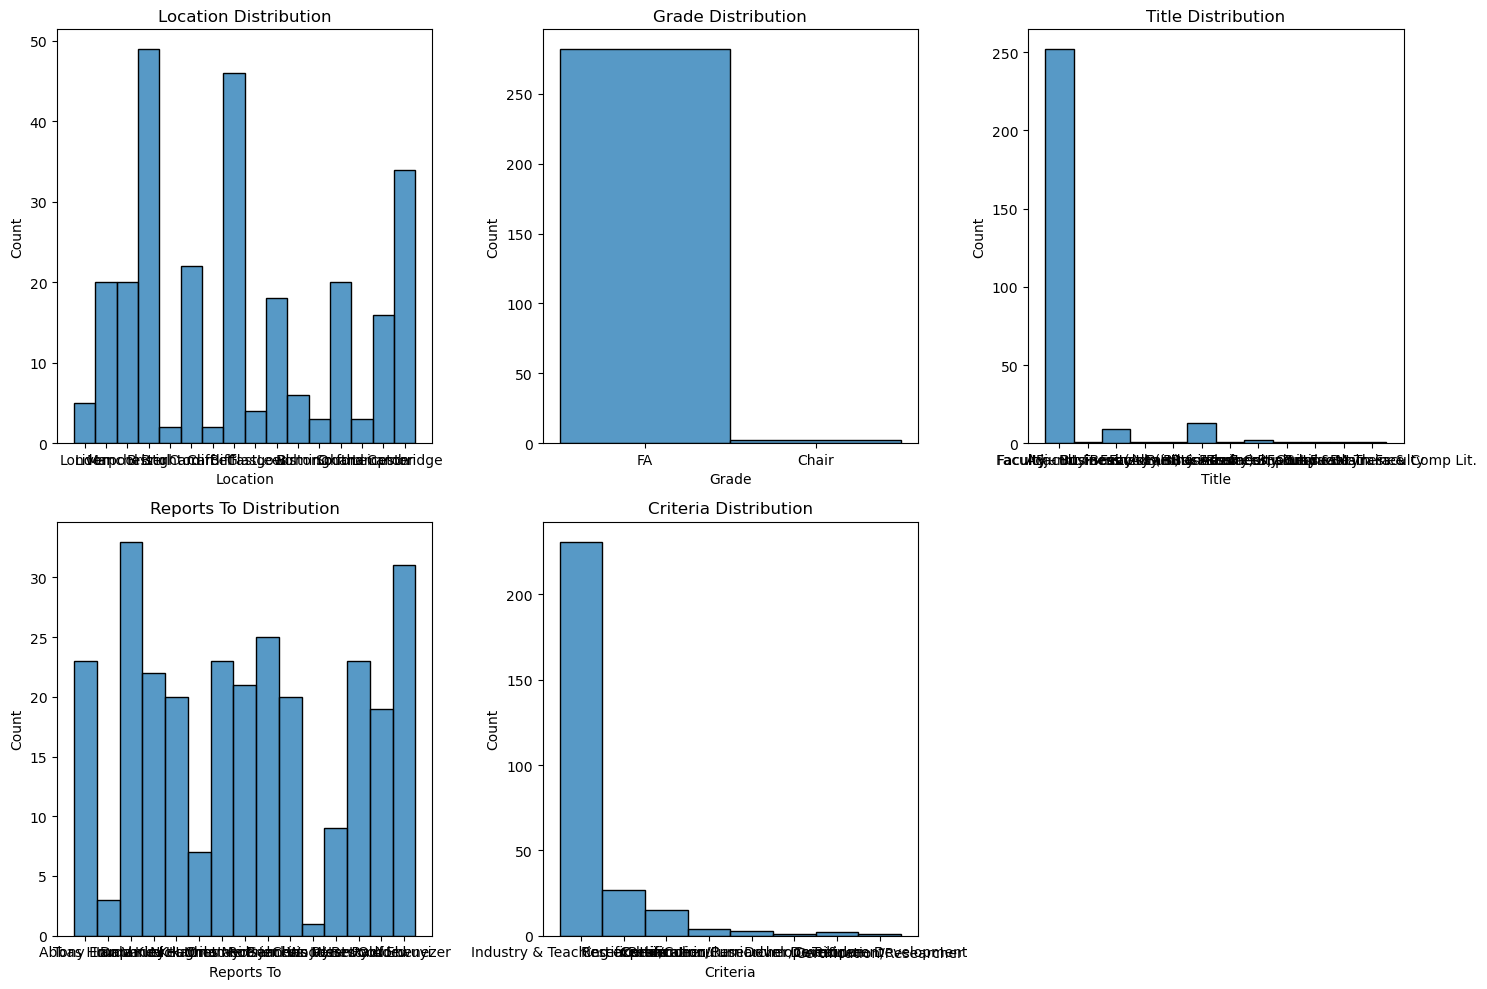

In [10]:
# Assuming 'df' is your DataFrame
variables_to_plot = ['Location', 'Grade', 'Title', 'Reports To', 'Criteria']

# Calculate the dimensions of the grid based on the number of variables
num_variables = len(variables_to_plot)
num_cols = 3  # Number of columns in the grid (adjust as needed)
num_rows = (num_variables - 1) // num_cols + 1  # Calculate the number of rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array if there's only one row or one column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot each variable on a separate subplot
for i, var in enumerate(variables_to_plot):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.histplot(data=df, x=var, ax=ax)
    ax.set_title(f'{var} Distribution')

# Remove any empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

##### Understand relationship between variables

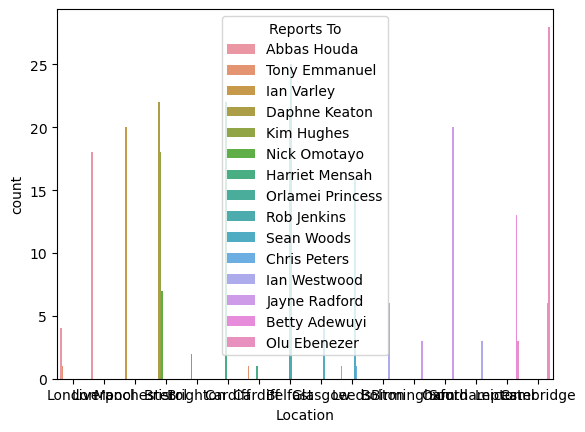

In [11]:
p = sns.countplot(data = df, x = 'Location', hue = 'Reports To')
for container in p.containers:
    ax.bar_label(container)

Note: the frequency distribution of some variables has shown that some varibales have skewed classes/categories.


<div style="border-top: 3px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### **4 Analyse dataset quality**
#### **4.1 Analyse data quality**
- Check duplicates
- Check missing values
- Check errors

##### Check duplicates

In [12]:
# Check duplicates by groupby on 'Name'.
duplicate_mask1 = df.groupby('ID')['ID'].transform('size') > 1
duplicate_mask2 = df.groupby('Name')['Name'].transform('size') > 1

duplicate_ID = df[duplicate_mask1] 
duplicate_Name = df[duplicate_mask2]
print('Duplicates for ID: ', duplicate_ID)
print('Duplicates for Name: ', duplicate_Name)

Duplicates for ID:      ID                  Name    Location  Grade               Title  \
3    0           Sally Smith      London     FA  Faculty - Business   
4    0          Ned Shearer       London  Chair  Faculty - Business   
49   0      Bobby Mc Pherson         NaN     FA  Faculty - Business   
50   0        Natasha MC Vey         NaN     FA  Faculty - Business   
51   0  Roxanne  Middleditch         NaN     FA  Faculty - Business   
52   0             Zak Piper         NaN     FA  Faculty - Business   
53   0           June Rayner         NaN     FA  Faculty - Business   
54   0         Sophia Spicer         NaN     FA  Faculty - Business   
55   0           Zoe Spencer         NaN     FA  Faculty - Business   
56   0         Lorenzo Spoto         NaN     FA  Faculty - Business   
57   0         Richard Terry         NaN     FA  Faculty - Business   
58   0          Fawne Vidler         NaN     FA  Faculty - Business   
102  0   Sebastian Alexander     Bristol     FA  Faculty 

Note: by double checking duplicates for ID, missing values of ID identified. 
For name, the duplicates are not real duplicates, these persons just happen to have the same names.

##### Check missing values

In [13]:
# Summarise the missing values for each column. 
df.isnull().sum()

ID                                                                                                                                 2
Name                                                                                                                               0
Location                                                                                                                          14
Grade                                                                                                                              0
Title                                                                                                                              0
Join\nDate                                                                                                                         1
LWD                                                                                                                              273
Type                                                                 

In [14]:
# Calculate the percentage of missing values for each column.
# Replace '0' with NaN, only for calculation purpose.
df.replace('0', np.nan, inplace=True)
# Calculating formula
missing_percentages = (df.isnull().sum()/ len(df)) *100
# Create missing data DateFrame to present the missing percentage.
missing_data_df = pd.DataFrame({'Column': df.columns, 'MissingPercentage': missing_percentages})
# Print the DataFrame
print(missing_data_df.to_string(index=False))

                                                                                                                       Column  MissingPercentage
                                                                                                                           ID           0.704225
                                                                                                                         Name           0.000000
                                                                                                                     Location           4.929577
                                                                                                                        Grade           0.000000
                                                                                                                        Title           0.000000
                                                                                                                   Join\nDate     

Note: as df.info() in previous session has already indicated if missing values exist for each variable, therefore, it 
makes more sense to check the sum and the percentage of the missing values for each variable. 

#### Check errors

Note: from the previous analysis, the obvious errors can be summerised as: 
- Typo in column name
- The formats of the column names are inconsistent
- Some variables have a very high percentage of missing values
- Some variables may have duplicate meanings or correlate strongly with other variables
- Some variables may indicate input error such as inconsistent input for the same value(s)

<div style="border-top: 5px solid #E6E6FA; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

#### **4.1 Analyse data relevance**

From the previous analysis, some variables are of little importance for ML modeling, such as "Name", because it has too many unique values and does not provide any further information for the ML model. 'Type' and 'Devison' have only one value, which does not provide variance for analysis. 'LWD' has too many missing values and its meaning in the dataset is unclear. 

Other variables such as "University" and "All qualifications from Profile" have many unique values, but can be retained for now as there may be opportunities to encode later. 


<div style="border-top: 3px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### **5 Preprocessing data**
#### **5.1 Handel data quality issues**
- Handling inconsistency
- Handling each variable

#### Handling inconsistency

In [15]:
# Change column names to title case
df.columns = [column.title() for column in df.columns]

In [16]:
# Rename the columns
# Define a dictionary of old column names with the corresponding new column names.
column_name_change = {
    'Location': 'Campus',
    'Grade': 'Faculty Type',
    'Join\nDate': 'Join Date',
    'Lwd': 'Last Working Day',
    'Divison': 'Division',
    'Type': 'Employment Status',
    'Highest\nQualification\nLevel': 'Highest Qualification Level',
    'Document Other Professional Certification Critiera Five Years Work Experience Teaching Excellence Professional Certifications': 'Other Professional Certifications'   
}
# Rename colunms using rename() method
df.rename(columns=column_name_change, inplace=True)
df.columns

Index(['Id', 'Name', 'Campus', 'Faculty Type', 'Title', 'Join Date',
       'Last Working Day', 'Employment Status', 'Division', 'Reports To',
       'Highest Qualification Level', 'Highest Qualification', 'Major',
       'University', 'All Qualifications From Profile',
       'Courses Taught- Term 201510', 'Major Teaching Field',
       'Other Professional Certifications', 'Criteria'],
      dtype='object')

#### Handling each variable
Note: it makes more sense to handel each variable in a time. Therefore the following will be handling processes for each variable. Variable 'ID' will be handled in the end to decide the importance and necessisity for keeping.

Handling 'Name'

Decision:
- Delation based on data privacy and model importance 

In [17]:
df = df.drop('Name', axis=1)

Handling 'Compus'

Decision: 
- Imputation based on relationship with other variable
- LableEncode into categories

In [18]:
# Create a DataFrame to store the relationships
location_reporting_df = df.groupby(['Campus', 'Reports To']).size().reset_index(name='Count')

# Iterate through the DataFrame and print the relationships
for index, row in location_reporting_df.iterrows():
    location = row['Campus']
    reports_to = row['Reports To']
    count = row['Count']
    print(f"Campus: {location} reports to {reports_to} (Count: {count})")

Campus: Belfast reports to Orlamei Princess (Count: 21)
Campus: Belfast reports to Rob Jenkins (Count: 25)
Campus: Birmingham reports to Jayne Radford (Count: 3)
Campus: Bolton reports to Ian Westwood (Count: 6)
Campus: Brighton reports to Kim Hughes (Count: 2)
Campus: Bristol reports to Daphne Keaton (Count: 22)
Campus: Bristol reports to Kim Hughes (Count: 18)
Campus: Bristol reports to Nick Omotayo (Count: 7)
Campus: Cambridge reports to Betty Adewuyi (Count: 6)
Campus: Cambridge reports to Olu Ebenezer (Count: 28)
Campus: Cardiff reports to Harriet Mensah (Count: 22)
Campus: Cardiff  reports to Harriet Mensah (Count: 1)
Campus: Cardiff  reports to Tony Emmanuel (Count: 1)
Campus: Glasgow reports to Sean Woods (Count: 4)
Campus: Leeds reports to Chris Peters (Count: 1)
Campus: Leeds reports to Sean Woods (Count: 16)
Campus: Leeds reports to Tony Emmanuel (Count: 1)
Campus: Leicester reports to Betty Adewuyi (Count: 13)
Campus: Leicester reports to Olu Ebenezer (Count: 3)
Campus: Liv

In [19]:
# Filter rows where 'Campus' is missing
missing_campus_df = df[df['Campus'].isna()]

# Display the 'Reports To' column for the rows with missing 'Campus'
missing_campus_reports_to = missing_campus_df['Reports To']

# Print the results
print(missing_campus_reports_to)

45     Ian Varley
46     Ian Varley
47     Ian Varley
48     Ian Varley
49    Abbas Houda
50     Ian Varley
51     Ian Varley
52     Ian Varley
53     Ian Varley
54     Ian Varley
55     Ian Varley
56     Ian Varley
57     Ian Varley
58     Ian Varley
Name: Reports To, dtype: object


Note:no all missing 'Campus' is related to the same report person.

In [20]:
# Replace with the actual value to exclude
value_to_exclude = 'Abbas Houda'  

# Create a condition to identify the rows where 'Campus' is not the value to exclude
condition = df['Reports To'] != value_to_exclude

# Fill missing values in the 'Campus' column with 'Manchester' for rows that meet the condition
df['Campus'] = np.where(condition, df['Campus'].fillna('Manchester'), df['Campus'])

In [21]:
# Use pd.get_dummies() to one-hot encode the 'Campus' column
one_hot = pd.get_dummies(df['Campus'], prefix='Campus')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot], axis=1)

Handling 'Faculty Type'

Decision: 
- LableEncode into categories

In [22]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode the 'Faculty Type'
df['Faculty TypeE'] = label_encoder.fit_transform(df['Faculty Type'])

Handling 'Title'

Decision: 
- Handle inconsistency
- LableEncode into categories

In [23]:
# Define a standarlise function
def standardize_value(value):
  
    # Additional custom transformations if needed
    if value == 'Business, Comp & Math Faculty':
        return 'Faculty - Business & Comp Lit.'
    elif value == 'Faculty - Business & Comp Lit Faculty':
        return 'Faculty - Business & Comp Lit.'
    elif value == 'Faculty - Business (Admin)':
        return 'Faculty-Business (HR & Admin.)'
    elif value == 'Faculty-Business':
        return 'Faculty - Business'
    elif value ==  'Faculty - Business ':
        return 'Faculty - Business'
    elif value == 'Faculty- Business':
        return 'Faculty - Business'
    elif value == 'Graduate Trainee':
        return 'Faculty - Trainee'
    else:
        return value

# Apply the custom function to the column
df['Title'] = df['Title'].apply(standardize_value)


In [24]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'Title'
df['TitleE'] = label_encoder.fit_transform(df['Title'])

Handling 'Join Date'

Decision: 
- Filling the missing values
- Feature engineering to separate the variable into 'Year', 'Month', and 'Weekday'.

In [25]:
# locate the missing index
missing_index = df[df['Join Date'].isna()].index
missing_index

Int64Index([104], dtype='int64')

In [26]:
# Replace with the index of the missing value you want to estimate
missing_index = 104

# Find the index of the record before the missing value
before_index = df.iloc[missing_index-1:missing_index].index[0] if missing_index > 0 else None

# Find the index of the record after the missing value
after_index = df.iloc[missing_index+1:missing_index+2].index[0] if missing_index < len(df) - 1 else None

# Extract the records before and after the missing value
record_before_missing = df.iloc[before_index] if before_index is not None else None
record_after_missing = df.iloc[after_index] if after_index is not None else None

print(record_before_missing, record_after_missing)

Id                                                                                   0
Campus                                                                         Bristol
Faculty Type                                                                        FA
Title                                                               Faculty - Business
Join Date                                                          2016-08-14 00:00:00
Last Working Day                                                                   NaT
Employment Status                                                            Full Time
Division                                                                      Business
Reports To                                                                Nick Omotayo
Highest Qualification Level                                                       Ph.D
Highest Qualification                                               Ph.D in Accounting
Major                                      

In [27]:
# Filling na
df['Join Date'].fillna('2016-08-14', inplace=True)

In [28]:
#  Extract Year, Month, and Weekday components. 
df['Join Year'] = df['Join Date'].dt.year.astype(int)
df['Join Month'] = df['Join Date'].dt.month.astype(int)
df['Join Weekday'] = df['Join Date'].dt.weekday.astype(int)

Handling 'Last Working Day'

Decision: 
- Feature engineering change to 'In Service', with all missing vaules treat as in service, none missing values means not in service.

In [29]:
# Create a new column to specify as 'In Service Yes/No'
df['In Service Yes/No'] = 0

# Set in service Yes to 1 for rows where 'Last Working Day' is missing
df.loc[df['Last Working Day'].isna(), 'In Service Yes/No'] = 1

# Set in service no to 0 for rows where 'Last Working Day' has values
df.loc[df['Last Working Day'].notna(), 'In Service Yes/No'] = 0


Handling 'Employment Status'

Decision: 
- Drop, as the only value is 'Full Time' it does not provide variability and more information. Drop unuseful info can reduce complexity. 

In [30]:
df = df.drop('Employment Status', axis=1)

Handling 'Division'

Decision: 
- Drop, same as 'Employment Status' has only value is 'Business' it does not provide variability and more information. Drop unuseful info can reduce complexity. 

In [31]:
df = df.drop('Division', axis=1)

Handling 'Reports To'

Decision: 
- Handling missing values
- Handling inconsistency
- LableEncode into categories


In [32]:
# Filter rows where 'Reports To' is missing
missing_reports_df = df[df['Reports To'].isna()]

# Display the 'Reports To' column for the rows with missing 'Campus'
missing_reports_to_Campus = missing_reports_df['Campus']

# Print the results
print(missing_reports_to_Campus)

21     Liverpool
22     Liverpool
100      Bristol
101      Bristol
Name: Campus, dtype: object


In [33]:
# Set a value can be referenced to.
value = 'Liverpool'

#Fill the missing values based on the replationship from variable 'Campus'
df.loc[df['Campus'] == value, 'Reports To'] = df.loc[df['Campus'] == value, 'Reports To'].fillna('Abbas Houda')
df.loc[df['Campus'] != value, 'Reports To'] = df.loc[df['Campus'] != value, 'Reports To'].fillna('Nick Omotayo')

In [34]:
# Use pd.get_dummies() to one-hot encode the 'Reports To' column
one_hot = pd.get_dummies(df['Reports To'], prefix='Reports To')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot], axis=1)

Handling 'Highest Qualification Level'

Decision: 
- Locate the missing indexes, as it was shown in the missing value percentages, that 'Highest Qualification Level', 'Highest Qualification' and 'University' all have 2.11% missing values
- Handling coorespondently, if all missing values appear for the same rows, then list drop, otherwise try to impute.
- LableEncode into categories.

In [35]:
missing_index_hql = df[df['Highest Qualification Level'].isna()].index
missing_index_hq = df[df['Highest Qualification'].isna()].index
missing_index_uni = df[df['University'].isna()].index

print('Missing index for Highest Qualification Level: ', missing_index_hql)
print('Missing index for Highest Qualification: ', missing_index_hq)
print('Missing index for University: ', missing_index_uni)

Missing index for Highest Qualification Level:  Int64Index([19, 99, 101, 245, 258, 259], dtype='int64')
Missing index for Highest Qualification:  Int64Index([19, 99, 101, 245, 258, 259], dtype='int64')
Missing index for University:  Int64Index([19, 99, 101, 245, 258, 259], dtype='int64')


In [36]:
# List drop missing value 
df = df.dropna(subset=['Highest Qualification Level']).reset_index(drop=True)

In [37]:
# Define a qualification level DataFrame
qualification_data = {'Highest Qualification Level': ["Doctorate", "Ph.D", "Doctor", "PHD", "Master", "Masters", "Master's", "Bachelor", "MBA"]}

# Define a function to standardise all the values

def standarlise_qualification(quanlification):

    if "Ph.D" in quanlification or "Doctorate" in quanlification or "Doctor" in quanlification or "PHD" in quanlification:
        return "Ph.D"
    elif "Master" in quanlification or "Masters" in quanlification or "Master's" in quanlification:
        return "Master"
    elif "Bachelor" in quanlification:
        return "Bachelor"
    elif "MBA" in quanlification:
        return "MBA"
    else:
        return quanlification

df['Highest Qualification Level'] = df['Highest Qualification Level'].apply(standarlise_qualification)

In [38]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'Title'
df['Highest Qualification LevelE'] = label_encoder.fit_transform(df['Highest Qualification Level'])

Handeling 'Highest Qualification'

Decision: 
- As previous shown 'Highest Qualification' and 'Highest Qualification Level' are highly associated. Thefore, further investgation on information input and accuracy need to be examed.

In [39]:
# Disply content
df['Highest Qualification']

0                                     Master of Arts
1                                  Master of Science
2                     Master of Business Administrat
3             Ph.D in HRM/ Organizational pyschology
4      Ph.D in Economics and International Business 
                           ...                      
273                           Economics and Business
274                               Management Science
275                                             Ph.D
276                                             Ph.D
277        Ph.D in Public Policy and Administration 
Name: Highest Qualification, Length: 278, dtype: object

In [40]:
# Display content
pd.set_option('display.max_colwidth', None)
df['All Qualifications From Profile']

0                                                                     Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)
1                                                                                             Bachelor of Arts (Finance), Certificate (Management Accounting), Master of Science (Business Info. Technology)
2      Certificate (Educating/Teaching Adult), Associate Diploma (Business & Management), Master of Business Administrat (Marketing), Bachelor of Commerce (Human Resources), Certificate (Applied Business)
3                                                                                                                                     Bachelor(finance & Mgt), Masters(MBA & Masters in Business Management)
4                                                                                                                                       Bachelor( Economics), Masters( Economics and

Note: from the comparation of the column 'Highest Qualification' and 'All Qualification From Profile' can see that the information in 'Highest Qualification' are not all accurate.Considering the complexity and also the high association with 'The Highest Qualification Level' decision is to drop this variable.

In [41]:
# Drop the variable
df = df.drop('Highest Qualification', axis=1)

Handling 'Major'

Decision: 
- Handle missing date
- Keep most relevent majors
- LableEncode

In [42]:
# Filter rows where 'Major' is missing
missing_major_df = df[df['Major'].isna()]

# Display the 'Reports To' column for the rows with missing 'Campus'
missing_major_to_all = missing_major_df['All Qualifications From Profile']

# Print the results
print(missing_major_to_all)

11                                                                                                              NaN
71                                                                   Bachelor (Computer Science), Masters (Banking)
74                                                                                                              NaN
105                                                                                                             NaN
122                                                                  Masters (), Bachelor (Business Administration)
131                                                                                                             NaN
151                                                                                                             NaN
157                                                                                                             NaN
190                                                    Bachelor (Applied

In [43]:
# Sample DataFrame with 'All Qualification From Profile' and 'Major' columns
data = {'All Qualifications From Profile': ['Masters (Economics)', 'Masters (Banking)', 'Higher Diploma (Applied Science)', 'Master of Philosophy (Business)', 'Higher Diploma (Applied Science)', 'Masters (Business Administration)', 'Ph.D (Economics)', np.nan],
        'Major': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]}

# Define a custom function to extract the major from the highest qualification
def extract_major(highest_qualification):
    if pd.notna(highest_qualification):
        # Split the text by ',' to separate qualifications
        qualifications = highest_qualification.split(', ')
        
        # Extract the highest qualification (last element in the list)
        highest_qual = qualifications[-1]
        
        # Extract the major within parentheses
        major = highest_qual.split('(')[-1].strip(')')
        
        return major
    else:
        return np.nan

# Use the custom function to fill missing 'Major' values
df['Major'].fillna(df['All Qualifications From Profile'].apply(extract_major), inplace=True)

In [44]:
df['Major'].fillna('No Input', inplace=True)

In [45]:
# Calculate the counts of each major
major_counts = df['Major'].value_counts().sort_values(ascending=False)
# Print all counts
for major, count in major_counts.items():
    print(f"{major}: {count}")

Business Administration: 46
Management: 22
Economics: 10
No Input: 10
Business: 9
Marketing: 8
Human Resource Management: 8
Accounting: 7
Finance: 7
Commerce: 6
International Business: 6
Strategic Management: 5
Business Management: 5
Education: 4
Business Adm (Hum Resources): 4
Banking: 3
Accounting & Finance: 3
Information Management: 3
Tourism Tourist & Hotel Mgt.: 2
Quality Management: 2
HRM and Organizational Behaviour : 2
Law: 2
Management Information System: 2
Executive MBA: 2
General Management: 2
Business Marketing: 2
E-Commerce: 2
Financial Management: 2
International Management: 2
International Marketing: 2
Public Administration: 1
Finance and Islamic Banking & Finance: 1
HRM/ Organizational Psychology: 1
Economics and International Business : 1
Health Administration: 1
Business Adm (General): 1
Public Admin & Public Policy: 1
Commerce & Management Studies: 1
General Business Admin: 1
E-Business: 1
Business Education: 1
Criminology & Criminal Justice: 1
Economics& Management:

In [46]:
# Set the number of top majors to keep
top_n = 15  # You can adjust this based on your preference

# Calculate the counts of each major
major_counts = df['Major'].value_counts()

# Get the top N majors and their counts
top_major_counts = major_counts.head(top_n)

# Create a list of the top N major names
top_majors = top_major_counts.index.tolist()

# Replace all other majors with 'Other'
df['Major'] = df['Major'].apply(lambda x: x if x in top_majors else 'Other')

In [47]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'Title'
df['MajorE'] = label_encoder.fit_transform(df['Major'])

Handling 'University'

Decision: 
- Keep most relevent majors
- LableEncode

In [48]:
# Calculate the counts of each university
uni_counts = df['University'].value_counts().sort_values(ascending=False)
# Print all counts
for uni, count in uni_counts.items():
    print(f"{uni}: {count}")

University of Wollongong: 8
Swiss Management Center: 5
University of Leicester: 5
University of Madras: 5
Harvard University: 4
University of Western Sydney: 4
Kings College London: 4
American University of Beirut: 3
Kent University: 3
Univ of Southern Queensland: 3
The University of Newcastle: 3
Birla Institute of Tech & Sc.: 3
University of New South Wales: 3
University of London: 3
University Of Dhaka: 2
University of Birmingham: 2
Universityof Kerala: 2
The University of Hull: 2
RMIT University: 2
Griffith University: 2
SNDT Women's University: 2
Capella University: 2
University of the Punjab: 2
University of Nebraska,USA: 2
Amman Arab University, Jordan: 2
McGill University: 2
University of Ulster: 2
University College Dublin: 2
University of Northumbria: 2
University of Central Florida: 2
University of Phoenix: 2
Massey University: 2
Hult Internationl Business Sch: 2
Capella University, USA : 2
Heriot-Watt University: 2
University of Portsmouth: 2
Friedrich-Schiller-Univ Jena: 1


In [49]:
# Set the number of top universities to keep
top_n = 20  

# Calculate the counts of each university
Uni_counts = df['University'].value_counts()

# Get the top N universities and their counts
top_uni_counts = Uni_counts.head(top_n)

# Create a list of the top N universities names
top_uni = top_uni_counts.index.tolist()

# Replace all other universities with 'Other'
df['University'] = df['University'].apply(lambda x: x if x in top_uni else 'Other')

In [50]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'UniversityE'
df['UniversityE'] = label_encoder.fit_transform(df['University'])

Handling 'All Qualifications From Profile'

Decision: 
- Feature engineering, considering the complexity of this variable, to extract as much as information as possible. By creating 'Double Degrees' to indicate douple masters degrees, 'Number of Qualifications' to provide an overview of the qualifications

In [51]:

# Create double degrees variable
def has_double_degrees(qualification):
    if not isinstance(qualification, (list, str)):
        return False
    return qualification.lower().count("Masters") >= 2

df['Double Degrees'] = df['All Qualifications From Profile'].apply(has_double_degrees)

# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'Title'
df['Double DegreesE'] = label_encoder.fit_transform(df['Double Degrees'])

In [52]:
# Define a custom function to count the number of qualifications
def count_qualifications(qualification):
    if pd.notna(qualification):
        # Ensure the qualification is a string before applying .lower()
        if isinstance(qualification, str):
            # Split the text by ',' to separate qualifications
            qualifications_list = qualification.split(', ')
            # Count the number of qualifications
            return len(qualifications_list)
    else:
        return 0

# Apply the custom function to create the 'Number of Qualifications' column
df['Number of Qualifications'] = df['All Qualifications From Profile'].apply(count_qualifications)
# Convert the column to integers
df['Number of Qualifications'] = df['Number of Qualifications'].astype(int)


Handling 'Courses Taught- Term 201510'

Decision: 
- Feature engineering, considering the complexity of this variable, to extract as much as information as possible. By creating 'No Of Courses Taught' to indicate to provide an overview of the taught course.

In [53]:
# Define a custom function to count the number of courses taught
def count_courses_taught(courses):
    if pd.notna(courses):
        # Split the text by the separator to separate courses
        courses_list = courses.split('\n')
        # Count the number of courses
        return len(courses_list)
    else:
        # Return 0 for missing values
        return 0

# Apply the custom function to create the 'No Of Courses Taught' column
df['No Of Courses Taught'] = df['Courses Taught- Term 201510'].apply(count_courses_taught)

Handling 'Major Teaching Field'

Decision: 
- As shown previously 'Major' and 'Major Teaching Field' are highly associated. Considering the complexity, so that to drop this variable.

In [54]:
df = df.drop('Major Teaching Field', axis=1)

Handling 'Other Professional Certifications'

Decision: 
- Given mixed input and many uique values, to extract two important information: 'Year of Professional Experience' and 'Year of Teaching Experience'.

In [55]:
import re
df['Other Professional Certifications'] = df['Other Professional Certifications'].apply(lambda x: re.sub(r'\+', '',str(x)))

In [56]:
# Define a function to extract years of professional experience
def extract_professional_experience(text):
    if pd.notna(text):
        # Use regular expressions to find years of experience
        professional_experience1 = re.findall(r'(\d+)\s*(?:years?|yrs?)\s*(?:professional|work|industry|business owner|SME|management|corporate|consulting|training)', text, re.IGNORECASE)
        professional_experience2 = re.findall(r'(?:professional|management) experience:\s*(\d+)', text, re.IGNORECASE)

        # Initialize variables to store extracted years
        professional_years = 0
    
        # Sum the extracted years
        if professional_experience1:
            professional_years = sum(map(int, professional_experience1))
        elif professional_experience2:
            professional_years = sum(map(int, professional_experience2))
            
        return professional_years
    else:
        return 0

# Apply the custom function to create new columns for professional years
df['Professional Experience Years'] = df['Other Professional Certifications'].apply(extract_professional_experience).apply(pd.Series)

In [57]:
# Define a function to extract years of teaching experience
def extract_teaching_experience(text):
    if pd.notna(text):
        # Use regular expressions to find years of experience
        teaching_experience1 = re.findall(r'(\d+)\s*(?:years?|yrs?)\s*teaching', text, re.IGNORECASE)
        teaching_experience2 = re.findall(r'years of teaching experience:\s*(\d+)', text, re.IGNORECASE)
        
        # Initialize variables to store extracted years
        teaching_years = 0

        # Sum the extracted years
        if teaching_experience1:
            teaching_years = sum(map(int, teaching_experience1))
        elif teaching_experience2:
            teaching_years = sum(map(int, teaching_experience2))
            
        return teaching_years
    else:
        return 0

# Apply the custom function to create new columns for teaching years
df['Teaching Experience Years'] = df['Other Professional Certifications'].apply(extract_teaching_experience).apply(pd.Series)

Handling 'Criteria'

Decision: 
- LableEncode, this could be the possible target variable if for supervised learning.
* Note: some criterias can be further grouped based on their instance values, but it is depending on the ML model to be choosen

In [58]:
# Initialise the encoder
label_encoder = LabelEncoder()
# Encode 'Title'
df['CriteriaE'] = label_encoder.fit_transform(df['Criteria'])

In [59]:
# Calculate the counts of each major
criteria_counts = df['CriteriaE'].value_counts().sort_values(ascending=False)
# Print all counts
for criteria, count in criteria_counts.items():
    print(f"{criteria}: {count}")

4: 225
0: 27
5: 15
6: 4
1: 3
7: 2
3: 1
2: 1


<div style="border-top: 5px solid #E6E6FA; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

#### **5.1 Save versions of data**
- Save intermediate dataset
- Save final dataset

Save intermediate dataset 
- As record for later reference and validation.

In [60]:
# Save intermediate dataset for later reference and validation purpose.
df.to_csv('intermediate_faculty_list_hotone.csv', index=False)

Save final dataset 
- Delete the none useful columns
- Decision on veraible 'Id'
- Save the final version as clean dataset and ready for training processing


In [61]:
# Delete all redundent and unuseful columns.
columns_to_drop = ['Campus', 'Faculty Type', 'Title', 'Join Date', 'Last Working Day', 'Reports To', 'Highest Qualification Level', 'Major', 'University', 'All Qualifications From Profile', 'Courses Taught- Term 201510', 'Other Professional Certifications', 'Criteria', 'Double Degrees']
existing_columns = df.columns
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [62]:
# Filter rows where 'Id' is equal to 0
id_zero_df = df[df['Id'] == 0]

# Display the 'Join Year' column for the rows where 'Id' is 0
join_year_for_id_zero = id_zero_df['Join Year']

# Print the results
print(join_year_for_id_zero)

3      2016
4      2016
48     2016
49     2016
50     2016
51     2016
52     2016
53     2016
54     2016
55     2016
56     2016
57     2016
99     2016
100    2016
101    2016
102    2016
103    2016
104    2016
129    2016
130    2016
176    2016
197    2016
198    2016
206    2016
207    2016
222    2016
223    2016
224    2016
225    2016
226    2016
227    2016
243    2016
244    2016
245    2016
272    2016
273    2016
274    2016
275    2016
276    2016
277    2016
Name: Join Year, dtype: int32


Note: the entire Ids for the year of 2016 are missing and have value '0'. There is hardly any paterns to impute the missing values. 
Decision: Drop Id.As this information is kept in intermediate dataset.

In [63]:
df = df.drop('Id', axis=1)

In [64]:
df.to_csv('clean_faculty_list_hotone.csv', index=False)

<div style="border-top: 3px solid #800080; animation: sparkling 2s linear infinite;"></div>

<style>
@keyframes sparkling {
  0% { background-position: 0 0; }
  100% { background-position: 100% 0; }
}
</style>

### **6 Validation and testing**